## 1. 데이터 수집 및 전처리
* 행정안전부 > 주민등록인구통계 https://jumin.mois.go.kr/index.jsp

    전체읍면동 현황

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

In [ ]:
os.listdir('./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/Jumin Data')

['202210_202210_주민등록인구및세대현황_월간.csv']

In [ ]:
data_src = "./drive/MyDrive/Colab Notebooks/알파코 파이썬 데이터 시각화 입문/Jumin Data/202210_202210_주민등록인구및세대현황_월간.csv"

### 1.1 데이터프레임 생성 및 전처리

#### 1.1.1. 데이터프레임 생성

In [ ]:
df = pd.read_csv(data_src, encoding='cp949')
df

,행정구역,2022년10월_총인구수,2022년10월_세대수,2022년10월_세대당 인구,2022년10월_남자 인구수,2022년10월_여자 인구수,2022년10월_남여 비율
0,서울특별시 (1100000000),"9,443,722","4,450,389",2.12,"4,578,459","4,865,263",0.94
1,서울특별시 종로구 (1111000000),"141,861","72,758",1.95,"68,601","73,260",0.94
2,서울특별시 종로구 청운효자동(1111051500),"11,700","5,150",2.27,"5,367","6,333",0.85
3,서울특별시 종로구 사직동(1111053000),"9,128","4,591",1.99,"4,045","5,083",0.80
4,서울특별시 종로구 삼청동(1111054000),"2,343","1,157",2.03,"1,113","1,230",0.90
...,...,...,...,...,...,...,...
3863,제주특별자치도 서귀포시 서홍동(5013058000),"11,242","4,619",2.43,"5,568","5,674",0.98
3864,제주특별자치도 서귀포시 대륜동(5013059000),"15,563","6,982",2.23,"7,841","7,722",1.02
3865,제주특별자치도 서귀포시 대천동(5013060000),"13,823","6,495",2.13,"7,004","6,819",1.03
3866,제주특별자치도 서귀포시 중문동(5013061000),"12,259","5,947",2.06,"6,222","6,037",1.03


#### 1.1.2. 컬럼명 변경

In [ ]:
# 하나의 컬럼명만 변경한다면 rename함수 사용해도됨
name_list="행정구역	2022년10월_총인구수	2022년10월_세대수	2022년10월_세대당 인구	2022년10월_남자 인구수	2022년10월_여자 인구수	2022년10월_남여 비율".split('2022년10월_')
columnslist=[]
for i in name_list:
    a= i.split('\t')
    columnslist.append(a[0])

df.columns=columnslist

In [ ]:
df.head(1)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),"9,443,722","4,450,389",2.12,"4,578,459","4,865,263",0.94


#### 1.1.3. 자료형 확인, 변환

In [ ]:
# 자료형 확인
df.dtypes
# 인구수를 숫자형으로 변환시켜야한다.

행정구역       object
총인구수       object
세대수        object
세대당 인구    float64
남자 인구수     object
여자 인구수     object
남여 비율     float64
dtype: object

In [ ]:
# 콤마 제거 후 자료형 변환
df['총인구수'] = df['총인구수'].str.replace(',','').astype('int64')
df['세대수'] = df['세대수'].str.replace(',','').astype('int64')
df['여자 인구수'] = df['여자 인구수'].str.replace(',','').astype('int64')
df['남자 인구수'] = df['남자 인구수'].str.replace(',','').astype('int64')
df.dtypes

행정구역       object
총인구수        int64
세대수         int64
세대당 인구    float64
남자 인구수      int64
여자 인구수      int64
남여 비율     float64
dtype: object

### 1.2. 시도별 서브셋 생성
* 컬럼.str.contains(문자열) : 문자열이 포함된 데이터 추출

In [ ]:
df
# 서울특별시 (1100000000) 처럼 뒤에가 전부 0인 데이터 찾기 -> 시,도

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9443722,4450389,2.12,4578459,4865263,0.94
1,서울특별시 종로구 (1111000000),141861,72758,1.95,68601,73260,0.94
2,서울특별시 종로구 청운효자동(1111051500),11700,5150,2.27,5367,6333,0.85
3,서울특별시 종로구 사직동(1111053000),9128,4591,1.99,4045,5083,0.80
4,서울특별시 종로구 삼청동(1111054000),2343,1157,2.03,1113,1230,0.90
...,...,...,...,...,...,...,...
3863,제주특별자치도 서귀포시 서홍동(5013058000),11242,4619,2.43,5568,5674,0.98
3864,제주특별자치도 서귀포시 대륜동(5013059000),15563,6982,2.23,7841,7722,1.02
3865,제주특별자치도 서귀포시 대천동(5013060000),13823,6495,2.13,7004,6819,1.03
3866,제주특별자치도 서귀포시 중문동(5013061000),12259,5947,2.06,6222,6037,1.03


In [ ]:
df_sido = df[df['행정구역'].str.contains('00000000')].copy()
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9443722,4450389,2.12,4578459,4865263,0.94
452,부산광역시 (2600000000),3322286,1556293,2.13,1622749,1699537,0.95
674,대구광역시 (2700000000),2366852,1070874,2.21,1164728,1202124,0.97
827,인천광역시 (2800000000),2962388,1320238,2.24,1483026,1479362,1.00
1000,광주광역시 (2900000000),1432651,652598,2.20,708119,724532,0.98
1103,대전광역시 (3000000000),1446863,673098,2.15,721745,725118,1.00
1191,울산광역시 (3100000000),1111707,486070,2.29,570960,540747,1.06
1253,세종특별자치시 (3600000000),382258,159129,2.40,190683,191575,1.00
1277,경기도 (4100000000),13579508,5908615,2.30,6835151,6744357,1.01
1897,강원도 (4200000000),1537339,755184,2.04,773491,763848,1.01


In [ ]:
# 시도명 컬럼 추가
df_sido['시도명'] = df_sido['행정구역'].str.split(" ").str[0]
df_sido.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
0,서울특별시 (1100000000),9443722,4450389,2.12,4578459,4865263,0.94,서울특별시
452,부산광역시 (2600000000),3322286,1556293,2.13,1622749,1699537,0.95,부산광역시
674,대구광역시 (2700000000),2366852,1070874,2.21,1164728,1202124,0.97,대구광역시
827,인천광역시 (2800000000),2962388,1320238,2.24,1483026,1479362,1.00,인천광역시
1000,광주광역시 (2900000000),1432651,652598,2.20,708119,724532,0.98,광주광역시


## 2. 시도별 인구수 시각화
* 인구 수가 가장 많은 지역은 어디일까?
* 인구 수가 가장 적은 지역은 어디일까?

### 2.1. 총 인구수로 데이터 정렬하기

In [ ]:
df_sido.sort_values('총인구수', ascending=False, inplace=True)
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1277,경기도 (4100000000),13579508,5908615,2.30,6835151,6744357,1.01,경기도
0,서울특별시 (1100000000),9443722,4450389,2.12,4578459,4865263,0.94,서울특별시
452,부산광역시 (2600000000),3322286,1556293,2.13,1622749,1699537,0.95,부산광역시
3485,경상남도 (4800000000),3284495,1516472,2.17,1653654,1630841,1.01,경상남도
827,인천광역시 (2800000000),2962388,1320238,2.24,1483026,1479362,1.00,인천광역시
3116,경상북도 (4700000000),2603389,1285483,2.03,1313237,1290152,1.02,경상북도
674,대구광역시 (2700000000),2366852,1070874,2.21,1164728,1202124,0.97,대구광역시
2280,충청남도 (4400000000),2121333,1017146,2.09,1085425,1035908,1.05,충청남도
2770,전라남도 (4600000000),1819157,907462,2.00,915996,903161,1.01,전라남도
2508,전라북도 (4500000000),1771776,855270,2.07,881608,890168,0.99,전라북도


### 2.2. 막대그래프로 시각화하기

#### 2.2.1. matplotlib.ptplot으로 시각화하기

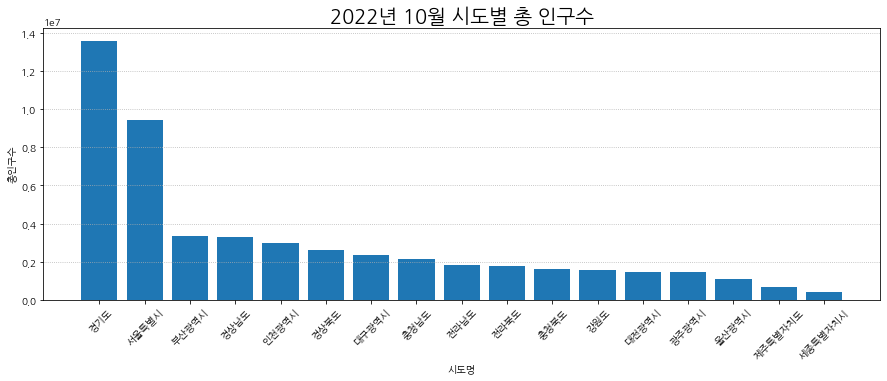

In [ ]:
plt.rcParams['figure.figsize']=(15,5)

plt.bar(df_sido['시도명'],df_sido['총인구수'])
plt.xticks(rotation=45)
plt.xlabel('시도명')
plt.ylabel('총인구수')
plt.title('2022년 10월 시도별 총 인구수', size=20)
plt.grid(axis='y',ls=':')
plt.show()

#### 2.2.2. seaborn으로 시각화하기

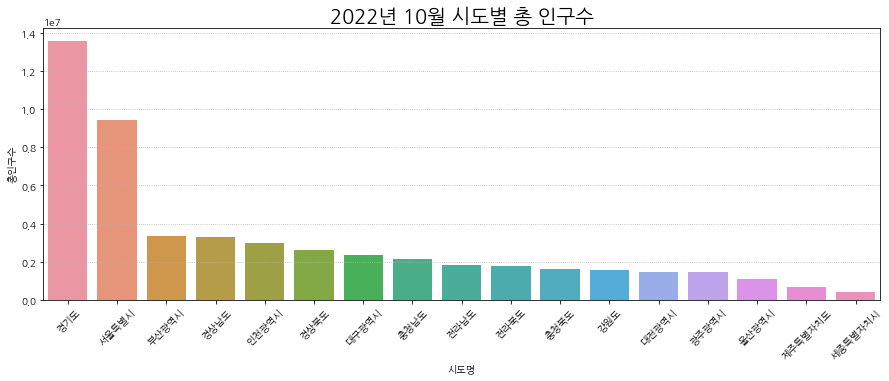

In [ ]:
sns.barplot(data=df_sido, x='시도명', y='총인구수')
plt.xticks(rotation=45)

plt.title('2022년 10월 시도별 총 인구수', size=20)
plt.grid(axis='y',ls=':')

plt.show()

### 2.3. 파이그래프로 시각화하기

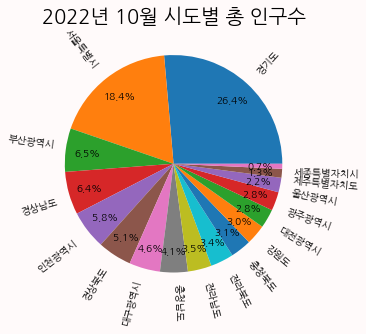

In [ ]:
plt.figure(facecolor='snow')
plt.pie(df_sido['총인구수'], labels=df_sido['시도명'], autopct='%.1f%%',
        pctdistance=0.8, rotatelabels=True)
plt.title('2022년 10월 시도별 총 인구수', size=20)
plt.show()

## 3. 세대당 인구수 시각화
* 2중 y축 표시하기
    
    fig, ax = plt.subplots()
    
    ax2 = ax1.twinx()

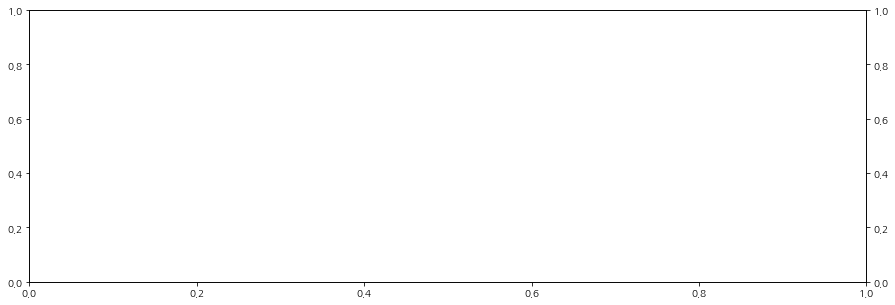

In [ ]:
# 틀 만들기
fig, ax1 = plt.subplots()

# x공유하는 새로운 ax 만들기
ax2 = ax1.twinx()

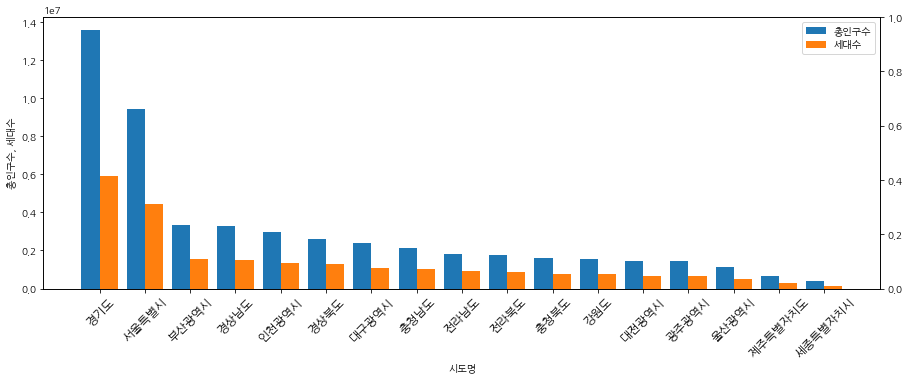

In [ ]:
# 틀 만들기
fig, ax1 = plt.subplots()

# ax1에 총인구수 막대그래프 그리기
ax1.bar(df_sido['시도명'], df_sido['총인구수'], width=-0.4, align='edge',
        label='총인구수')                       # 왼쪽으로 치우치게


# ax1에 세대수 막대그래프 그리기
ax1.bar(df_sido['시도명'], df_sido['세대수'], width=0.4, align='edge',
        label='세대수')                       # 오른쪽으로 치우치게

# 범례
ax1.legend()
# x,y 레이블
ax1.set_xlabel('시도명')
ax1.set_ylabel('총인구수, 세대수')
plt.xticks(rotation=45, fontsize=12)

# x공유하는 새로운 ax 만들기
ax2 = ax1.twinx()


plt.show()

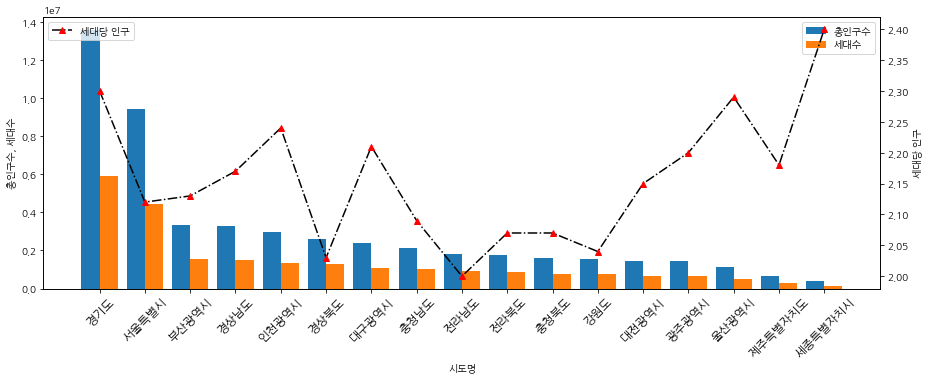

In [ ]:
# 틀 만들기
fig, ax1 = plt.subplots()

# ax1에 총인구수 막대 그래프 그리기
ax1.bar(df_sido['시도명'], df_sido['총인구수'], width=-0.4, align='edge',
        label='총인구수')                       # 왼쪽으로 치우치게


# ax1에 세대수 막대 그래프 그리기
ax1.bar(df_sido['시도명'], df_sido['세대수'], width=0.4, align='edge',
        label='세대수')                       # 오른쪽으로 치우치게

# 범례
ax1.legend()
# x,y 레이블
ax1.set_xlabel('시도명')
ax1.set_ylabel('총인구수, 세대수')
plt.xticks(rotation=45, fontsize=12)

# x공유하는 새로운 ax 만들기
ax2 = ax1.twinx()

# ax2에 세대당 인구 선 그래프 그리기
ax2.plot(df_sido['시도명'], df_sido['세대당 인구'],'k^-.',
         mfc='r',mec='r', label='세대당 인구')

# 범례
ax2.legend()
# y 레이블
ax2.set_ylabel('세대당 인구')

plt.show()

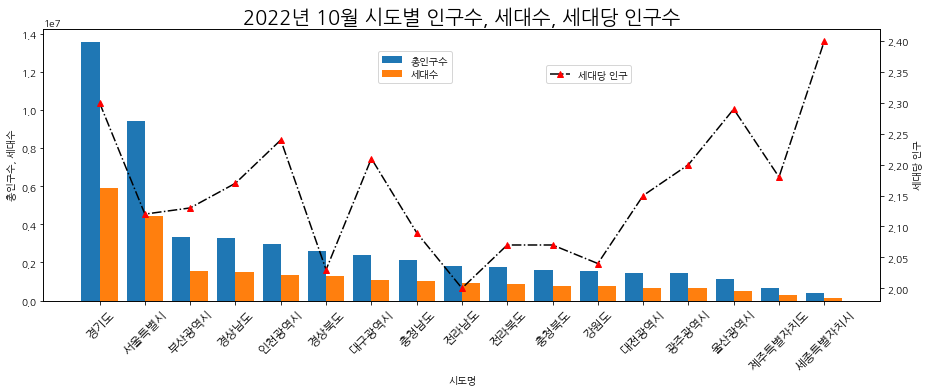

In [ ]:
# 틀 만들기
fig, ax1 = plt.subplots()

# ax1에 총인구수 막대 그래프 그리기
ax1.bar(df_sido['시도명'], df_sido['총인구수'], width=-0.4, align='edge',
        label='총인구수') 
                      # 왼쪽으로 치우치게
# ax1에 세대수 막대 그래프 그리기
ax1.bar(df_sido['시도명'], df_sido['세대수'], width=0.4, align='edge',
        label='세대수')                       # 오른쪽으로 치우치게

# 범례 위치조정
ax1.legend(loc=(0.4, 0.8)) # 왼쪽 아래 모서리 기준

# x,y 레이블
ax1.set_xlabel('시도명')
ax1.set_ylabel('총인구수, 세대수')
plt.xticks(rotation=45, fontsize=12)

# x공유하는 새로운 ax 만들기
ax2 = ax1.twinx()

# ax2에 세대당 인구 선 그래프 그리기
ax2.plot(df_sido['시도명'], df_sido['세대당 인구'],'k^-.',
         mfc='r',mec='r', label='세대당 인구')
# y 레이블
ax2.set_ylabel('세대당 인구')

# 범례 위치조정
ax2.legend(loc=(0.6, 0.8))

# 제목
ax2.set_title('2022년 10월 시도별 인구수, 세대수, 세대당 인구수',size=20)

plt.show()

# 세종시는 인구수는 가장 적지만 세대당 인구 가장 많다.

## 4. 시도별 성별 인구수 시각화
* 2중 y축 표시하기

    fig, ax = plt.subplots()

    ax2 = ax1.twinx()

In [ ]:
df_sido.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1277,경기도 (4100000000),13579508,5908615,2.30,6835151,6744357,1.01,경기도
0,서울특별시 (1100000000),9443722,4450389,2.12,4578459,4865263,0.94,서울특별시
452,부산광역시 (2600000000),3322286,1556293,2.13,1622749,1699537,0.95,부산광역시
3485,경상남도 (4800000000),3284495,1516472,2.17,1653654,1630841,1.01,경상남도
827,인천광역시 (2800000000),2962388,1320238,2.24,1483026,1479362,1.00,인천광역시


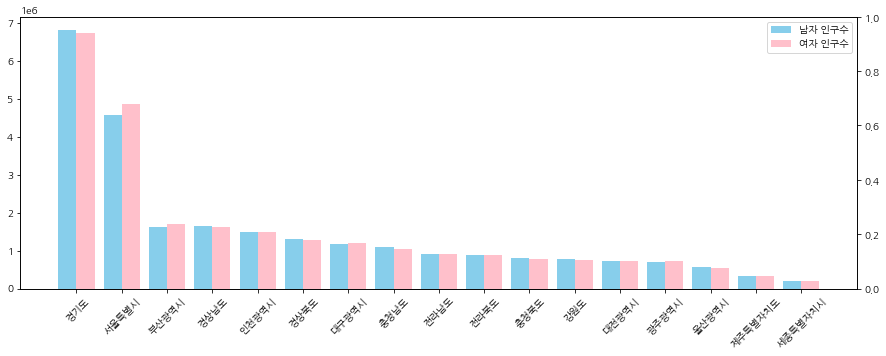

In [ ]:
# 틀만들기
fig, ax1 = plt.subplots()
# 시도별 남자, 여자 인구수 막대그래프 그리기
ax1.bar(df_sido['시도명'], df_sido['남자 인구수'], width=-0.4, align='edge',
        color='skyblue', label='남자 인구수')
ax1.bar(df_sido['시도명'], df_sido['여자 인구수'], width=0.4, align='edge',
        color='pink', label='여자 인구수')

# 범례표시
ax1.legend()
# x틱
plt.xticks(rotation=45)

# x축을 공유하는 ax2생성
ax2=ax1.twinx()


plt.show()

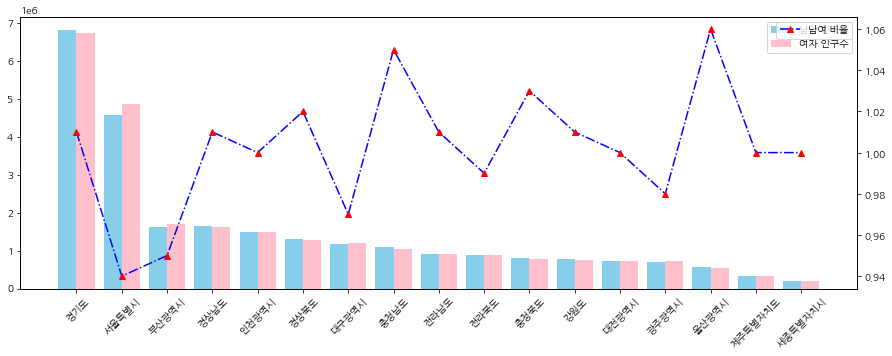

In [ ]:
# 틀만들기
fig, ax1 = plt.subplots()
# 시도별 남자, 여자 인구수 막대그래프 그리기
ax1.bar(df_sido['시도명'], df_sido['남자 인구수'], width=-0.4, align='edge',
        color='skyblue', label='남자 인구수')
ax1.bar(df_sido['시도명'], df_sido['여자 인구수'], width=0.4, align='edge',
        color='pink', label='여자 인구수')

# 범례표시
ax1.legend()
# x틱
plt.xticks(rotation=45)

# x축을 공유하는 ax2생성
ax2=ax1.twinx()

# 남녀비율 선그래프 그리기
ax2.plot(df_sido['시도명'], df_sido['남여 비율'],'b^-.', mfc='r',mec='r',
         label='남여 비율')

# 범례표시
ax2.legend()

plt.show()


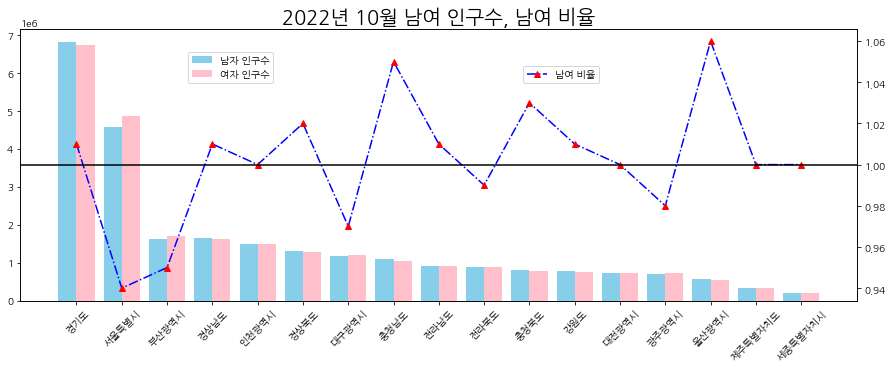

In [ ]:
# 틀만들기
fig, ax1 = plt.subplots()
# 시도별 남자, 여자 인구수 막대그래프 그리기
ax1.bar(df_sido['시도명'], df_sido['남자 인구수'], width=-0.4, align='edge',
        color='skyblue', label='남자 인구수')
ax1.bar(df_sido['시도명'], df_sido['여자 인구수'], width=0.4, align='edge',
        color='pink', label='여자 인구수')

# 범례표시
ax1.legend(loc=(0.2,0.8))
# x틱
plt.xticks(rotation=45)

# x축을 공유하는 ax2생성
ax2=ax1.twinx()

# 남녀비율 선그래프 그리기
ax2.plot(df_sido['시도명'], df_sido['남여 비율'],'b^-.', mfc='r',mec='r',
         label='남여 비율')

# 범례표시
ax2.legend(loc=(0.6,0.8))

# ax2의 1에 수평선 그리기
ax2.axhline(1, color='k')

#제목
ax2.set_title('2022년 10월 남여 인구수, 남여 비율', size=20)
plt.show()

### 4.1. 성별 인구수 차이

#### 4.1.1. 성별 인구수 차이 컬럼 생성
* 내림차순으로 정렬

In [ ]:
# 컬럼생성
df_sido['남여 인구수 차이'] = df_sido['남자 인구수']-df_sido['여자 인구수']
df_sido.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명,남여 인구수 차이
1277,경기도 (4100000000),13579508,5908615,2.30,6835151,6744357,1.01,경기도,90794
0,서울특별시 (1100000000),9443722,4450389,2.12,4578459,4865263,0.94,서울특별시,-286804
452,부산광역시 (2600000000),3322286,1556293,2.13,1622749,1699537,0.95,부산광역시,-76788
3485,경상남도 (4800000000),3284495,1516472,2.17,1653654,1630841,1.01,경상남도,22813
827,인천광역시 (2800000000),2962388,1320238,2.24,1483026,1479362,1.00,인천광역시,3664


In [75]:
# 내림차 정렬
df_sido.sort_values('남여 인구수 차이', ascending=False, inplace=True)
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명,남여 인구수 차이
1277,경기도 (4100000000),13579508,5908615,2.30,6835151,6744357,1.01,경기도,90794
2280,충청남도 (4400000000),2121333,1017146,2.09,1085425,1035908,1.05,충청남도,49517
1191,울산광역시 (3100000000),1111707,486070,2.29,570960,540747,1.06,울산광역시,30213
2110,충청북도 (4300000000),1595578,771479,2.07,810747,784831,1.03,충청북도,25916
3116,경상북도 (4700000000),2603389,1285483,2.03,1313237,1290152,1.02,경상북도,23085
3485,경상남도 (4800000000),3284495,1516472,2.17,1653654,1630841,1.01,경상남도,22813
2770,전라남도 (4600000000),1819157,907462,2.00,915996,903161,1.01,전라남도,12835
1897,강원도 (4200000000),1537339,755184,2.04,773491,763848,1.01,강원도,9643
827,인천광역시 (2800000000),2962388,1320238,2.24,1483026,1479362,1.00,인천광역시,3664
3822,제주특별자치도 (5000000000),678324,311251,2.18,339731,338593,1.00,제주특별자치도,1138


#### 4.1.2. 시각화

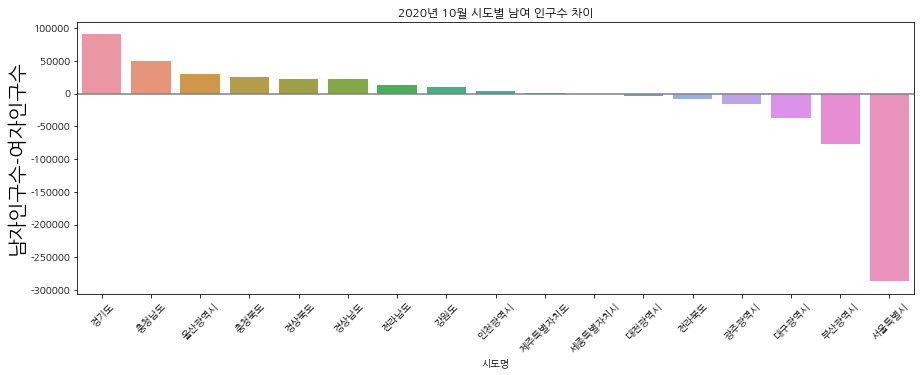

In [81]:
# 그래프 그리기
sns.barplot(data=df_sido, x='시도명', y='남여 인구수 차이')
# x틱 회전
plt.xticks(rotation=45)
# 0에 수평선
plt.axhline(0, color='gray')
# 제목
plt.title('2020년 10월 시도별 남여 인구수 차이')
# y 레이블 변경
plt.ylabel('남자인구수-여자인구수', size=20)
plt.show()

## 5. 서울시 구별/동별 인구수 시각화

### 5.1. 서울시 구별 인구수 시각화

#### 5.1.1. 서브셋 생성

In [82]:
df.head()
# 구 (11 이 있는 데이터. 11은 서울시. 서울시의 구

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9443722,4450389,2.12,4578459,4865263,0.94
1,서울특별시 종로구 (1111000000),141861,72758,1.95,68601,73260,0.94
2,서울특별시 종로구 청운효자동(1111051500),11700,5150,2.27,5367,6333,0.85
3,서울특별시 종로구 사직동(1111053000),9128,4591,1.99,4045,5083,0.80
4,서울특별시 종로구 삼청동(1111054000),2343,1157,2.03,1113,1230,0.90


In [108]:
# 구별 서브셋 생성
# 특수문자가 있는 경우 contains 사용불가
# find가 그 문자열이 어느위치에 있는지 반환해줌 -> 없는 경우 -1
df_seoul = df[df['행정구역'].str.find('구 (11')>0].copy()
df_seoul

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,서울특별시 종로구 (1111000000),141861,72758,1.95,68601,73260,0.94
19,서울특별시 중구 (1114000000),120648,63206,1.91,58643,62005,0.95
35,서울특별시 용산구 (1117000000),219102,109936,1.99,105303,113799,0.93
52,서울특별시 성동구 (1120000000),281694,133599,2.11,137075,144619,0.95
70,서울특별시 광진구 (1121500000),337900,169382,1.99,162844,175056,0.93
86,서울특별시 동대문구 (1123000000),337273,170169,1.98,166113,171160,0.97
101,서울특별시 중랑구 (1126000000),385976,187467,2.06,189869,196107,0.97
118,서울특별시 성북구 (1129000000),431581,197535,2.18,207584,223997,0.93
139,서울특별시 강북구 (1130500000),294429,144552,2.04,143000,151429,0.94
153,서울특별시 도봉구 (1132000000),312427,138521,2.26,151811,160616,0.95


In [86]:
df_seoul.shape
# 서울에는 25개의 구가 있다.

(25, 7)

In [88]:
# 구 이름으로만 컬럼 만들기
df_seoul['구'] = df_seoul['행정구역'].str.split(' ').str[1]
df_seoul.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,구
1,서울특별시 종로구 (1111000000),141861,72758,1.95,68601,73260,0.94,종로구
19,서울특별시 중구 (1114000000),120648,63206,1.91,58643,62005,0.95,중구
35,서울특별시 용산구 (1117000000),219102,109936,1.99,105303,113799,0.93,용산구
52,서울특별시 성동구 (1120000000),281694,133599,2.11,137075,144619,0.95,성동구
70,서울특별시 광진구 (1121500000),337900,169382,1.99,162844,175056,0.93,광진구


In [90]:
# 인구수 내림차 정렬하기
df_seoul = df_seoul.sort_values('총인구수', ascending=False)
df_seoul

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,구
404,서울특별시 송파구 (1171000000),659788,285087,2.31,317743,342045,0.93,송파구
256,서울특별시 강서구 (1150000000),570011,273776,2.08,273644,296367,0.92,강서구
381,서울특별시 강남구 (1168000000),529946,233474,2.27,253570,276376,0.92,강남구
168,서울특별시 노원구 (1135000000),505058,217956,2.32,242826,262232,0.93,노원구
340,서울특별시 관악구 (1162000000),487201,283378,1.72,244980,242221,1.01,관악구
188,서울특별시 은평구 (1138000000),468988,214702,2.18,223764,245224,0.91,은평구
432,서울특별시 강동구 (1174000000),460413,202341,2.28,225303,235110,0.96,강동구
237,서울특별시 양천구 (1147000000),441749,181370,2.44,216133,225616,0.96,양천구
118,서울특별시 성북구 (1129000000),431581,197535,2.18,207584,223997,0.93,성북구
362,서울특별시 서초구 (1165000000),404902,168146,2.41,193465,211437,0.92,서초구


#### 5.1.2. 시각화

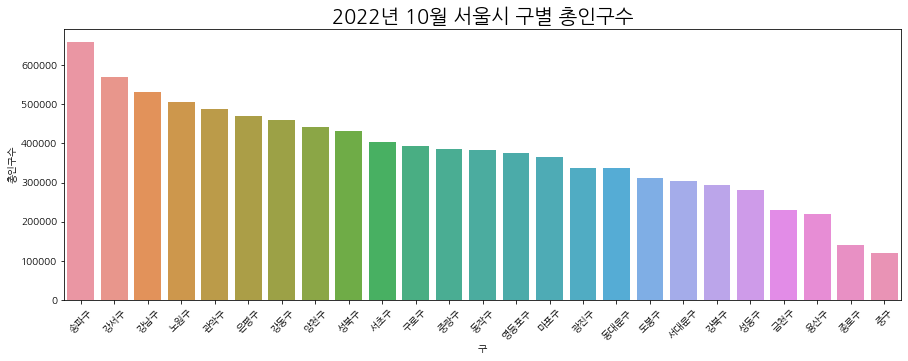

In [95]:
sns.barplot(data=df_seoul, x='구', y="총인구수")
plt.xticks(rotation=45)
plt.title('2022년 10월 서울시 구별 총인구수', size=20)
plt.show()

### 5.2. 동별 인구수 시각화
* 가장 인구가 많은 송파구 동별 인구수 시각화

#### 5.2.1. 서브셋 만들기

In [97]:
df[df['행정구역'].str.find('송파구')>0]
# 송파구만 있는 데이터를 제외하고 싶다.

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
404,서울특별시 송파구 (1171000000),659788,285087,2.31,317743,342045,0.93
405,서울특별시 송파구 풍납1동(1171051000),12469,5869,2.12,6118,6351,0.96
406,서울특별시 송파구 풍납2동(1171052000),24265,10841,2.24,11507,12758,0.90
407,서울특별시 송파구 거여1동(1171053100),12213,5594,2.18,6144,6069,1.01
408,서울특별시 송파구 거여2동(1171053200),23623,9999,2.36,11542,12081,0.96
409,서울특별시 송파구 마천1동(1171054000),18557,8730,2.13,9513,9044,1.05
410,서울특별시 송파구 마천2동(1171055000),18052,8616,2.10,9236,8816,1.05
411,서울특별시 송파구 방이1동(1171056100),15432,6187,2.49,7451,7981,0.93
412,서울특별시 송파구 방이2동(1171056200),25915,15177,1.71,11896,14019,0.85
413,서울특별시 송파구 오륜동(1171056600),17789,5894,3.02,8677,9112,0.95


In [ ]:
df_song = df[df['행정구역'].str.find('동(1171')>0].copy()
df_song

In [100]:
# 동이름 칼럼 만들기
df_song['행정구역'].str.split(' ').str[2]

405    풍납1동(1171051000)
406    풍납2동(1171052000)
407    거여1동(1171053100)
408    거여2동(1171053200)
409    마천1동(1171054000)
410    마천2동(1171055000)
411    방이1동(1171056100)
412    방이2동(1171056200)
413     오륜동(1171056600)
414     오금동(1171057000)
415    송파1동(1171058000)
416    송파2동(1171059000)
417     석촌동(1171060000)
418     삼전동(1171061000)
419    가락본동(1171062000)
420    가락1동(1171063100)
421    가락2동(1171063200)
422    문정1동(1171064100)
423    문정2동(1171064200)
424     장지동(1171064600)
425     위례동(1171064700)
426    잠실본동(1171065000)
427    잠실2동(1171067000)
428    잠실3동(1171068000)
429    잠실4동(1171069000)
430    잠실6동(1171071000)
431    잠실7동(1171072000)
Name: 행정구역, dtype: object

In [ ]:
df_song['동'] = df_song['행정구역'].str.split(' ').str[2].str.split('(').str[0]
df_song

In [106]:
# 동별 인구수 내림차 정렬
df_song = df_song.sort_values('총인구수', ascending=False)
df_song

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,동
425,서울특별시 송파구 위례동(1171064700),44338,14410,3.08,21644,22694,0.95,위례동
414,서울특별시 송파구 오금동(1171057000),37884,15606,2.43,18401,19483,0.94,오금동
427,서울특별시 송파구 잠실2동(1171067000),34739,11526,3.01,16569,18170,0.91,잠실2동
428,서울특별시 송파구 잠실3동(1171068000),33994,11823,2.88,16154,17840,0.91,잠실3동
421,서울특별시 송파구 가락2동(1171063200),31584,12362,2.55,15423,16161,0.95,가락2동
417,서울특별시 송파구 석촌동(1171060000),31100,16834,1.85,14763,16337,0.90,석촌동
418,서울특별시 송파구 삼전동(1171061000),29582,15973,1.85,13855,15727,0.88,삼전동
424,서울특별시 송파구 장지동(1171064600),28979,12097,2.40,13965,15014,0.93,장지동
423,서울특별시 송파구 문정2동(1171064200),28734,15723,1.83,13179,15555,0.85,문정2동
426,서울특별시 송파구 잠실본동(1171065000),27875,15798,1.76,13307,14568,0.91,잠실본동


#### 5.2.2. 시각화

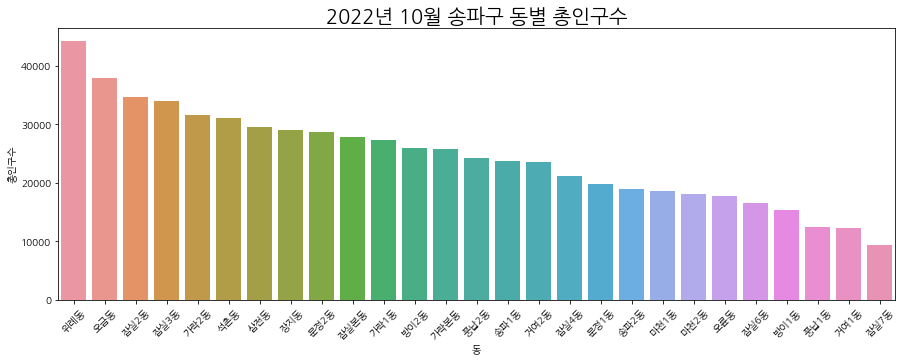

In [107]:
sns.barplot(data=df_song, x='동', y='총인구수')
plt.xticks(rotation=45)
plt.title('2022년 10월 송파구 동별 총인구수', size=20)
plt.show()